# 下載泰坦尼克號上旅客的數據集

In [ ]:
import urllib.request
import os

In [ ]:
url="https://biostat.app.vumc.org/wiki/pub/Main/DataSets/titanic3.xls"
filepath = "./data/titanic3.xls"

if not os.path.isfile(filepath):
    os.makedirs(os.path.dirname(filepath), exist_ok=True) # create the directory if it doesn't exist
    result = urllib.request.urlretrieve(url, filepath)
    print("Downloaded:", result)

Downloaded: ('./data/titanic3.xls', <http.client.HTTPMessage object at 0x7fee77e211b0>)


# 1. Import Library

In [ ]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

# 數據準備

In [ ]:
all_df = pd.read_excel("./data/titanic3.xls")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cols=['survived','name','pclass' ,'sex', 'age', 'sibsp',
      'parch', 'fare', 'embarked']
all_df=all_df[cols]

In [ ]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [ ]:
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1309 train: 1034 test: 275


In [ ]:
def PreprocessData(raw_df):
    df=raw_df.drop(['name'], axis=1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex']= df['sex'].map({'female':0, 'male': 1}).astype(int)
    x_OneHot_df = pd.get_dummies(data=df,columns=["embarked" ])

    ndarray = x_OneHot_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
    
    return scaledFeatures,Label

In [ ]:
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

# 3. Create Model 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units=40, input_dim=9, 
                kernel_initializer='uniform', 
                activation='relu'))

In [ ]:
model.add(Dense(units=30, 
                kernel_initializer='uniform', 
                activation='relu'))

In [ ]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

# 4. Train model

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [ ]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=30,verbose=2)

Epoch 1/30
31/31 - 1s - loss: 0.6900 - accuracy: 0.5806 - val_loss: 0.6744 - val_accuracy: 0.7885 - 1s/epoch - 43ms/step
Epoch 2/30
31/31 - 0s - loss: 0.6653 - accuracy: 0.6247 - val_loss: 0.5898 - val_accuracy: 0.7885 - 113ms/epoch - 4ms/step
Epoch 3/30
31/31 - 0s - loss: 0.6037 - accuracy: 0.6882 - val_loss: 0.4875 - val_accuracy: 0.8077 - 94ms/epoch - 3ms/step
Epoch 4/30
31/31 - 0s - loss: 0.5378 - accuracy: 0.7742 - val_loss: 0.4669 - val_accuracy: 0.7788 - 94ms/epoch - 3ms/step
Epoch 5/30
31/31 - 0s - loss: 0.5061 - accuracy: 0.7667 - val_loss: 0.4723 - val_accuracy: 0.7885 - 81ms/epoch - 3ms/step
Epoch 6/30
31/31 - 0s - loss: 0.4923 - accuracy: 0.7624 - val_loss: 0.4524 - val_accuracy: 0.7885 - 94ms/epoch - 3ms/step
Epoch 7/30
31/31 - 0s - loss: 0.4853 - accuracy: 0.7613 - val_loss: 0.4388 - val_accuracy: 0.7981 - 86ms/epoch - 3ms/step
Epoch 8/30
31/31 - 0s - loss: 0.4804 - accuracy: 0.7559 - val_loss: 0.4401 - val_accuracy: 0.7981 - 83ms/epoch - 3ms/step
Epoch 9/30
31/31 - 0s - 

# 6. Print History

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

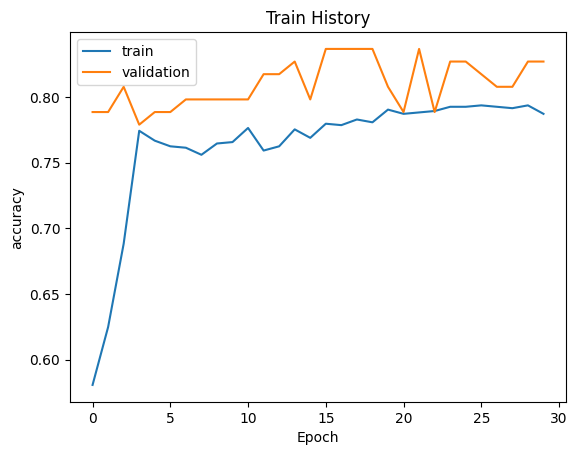

In [ ]:
show_train_history(train_history,'accuracy','val_accuracy')

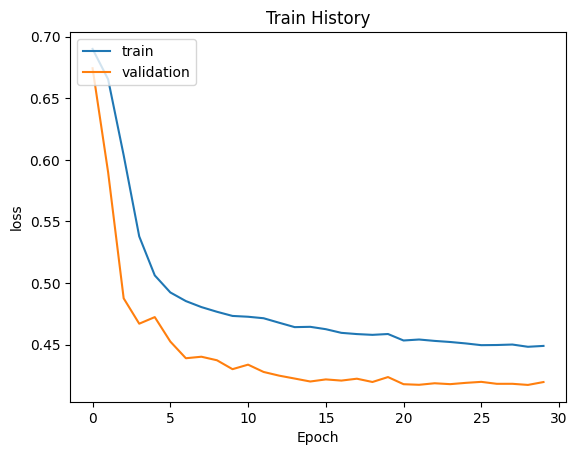

In [ ]:
show_train_history(train_history,'loss','val_loss')

# 評估模型的準確率

In [ ]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

9/9 [==============================] - 0s 3ms/step - loss: 0.4392 - accuracy: 0.8036


In [ ]:
scores[1]

0.803636372089386

# 預測數據

## 加入Jack & Rose數據

In [ ]:
Jack = pd.Series([0 ,'Jack',3, 'male'  , 23, 1, 0,  5.0000,'S'])
Rose = pd.Series([1 ,'Rose',1, 'female', 20, 1, 0, 100.0000,'S'])

In [ ]:
JR_df = pd.DataFrame([list(Jack),list(Rose)],  
                  columns=['survived', 'name','pclass', 'sex', 
                   'age', 'sibsp','parch', 'fare','embarked'])

In [ ]:
all_df=pd.concat([all_df,JR_df])

In [ ]:
all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


# 進行預測

In [ ]:
all_Features,Label=PreprocessData(all_df)

In [ ]:
all_probability=model.predict(all_Features)

41/41 [==============================] - 0s 1ms/step


In [ ]:
all_probability[:10]

array([[0.97528785],
       [0.5736337 ],
       [0.9751105 ],
       [0.37669197],
       [0.9714199 ],
       [0.25286296],
       [0.9425038 ],
       [0.30135724],
       [0.9413143 ],
       [0.29714236]], dtype=float32)

In [ ]:
pd=all_df
pd.insert(len(all_df.columns),
          'probability',all_probability)

# 預測Jack & Rose數據的生存機率

In [ ]:
pd[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.132986
1,1,Rose,1,female,20.0,1,0,100.0,S,0.968681


# 查看生存機率高，卻沒有存活

In [ ]:
pd[(pd['survived']==0) &  (pd['probability']>0.9) ]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.975110
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.971420
105,0,"Evans, Miss. Edith Corse",1,female,36.0,0,0,31.6792,C,0.979304
169,0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.976701
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",1,female,63.0,1,0,221.7792,S,0.957684


In [ ]:
pd[:5]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S,0.975288
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S,0.573634
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S,0.975110
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S,0.376692
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S,0.971420
